## CTA200 2021 Assignment 2
DUE: Saturday May 8th by 5:00PM  
Sinthushan Sivakumar  
1004337283  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
def deriv1(f, x0, h):
    """Calculate the approximate derivative of a function, f, at
    the the point, x0.
    
    Parameters:
    f - A given function
    x0 - A point given as a float
    h - small step < 1
        
    Returns:
    The approximation of the derivative at x0 using stepsize h for
    a function f.
    """
    return (f(x0+h)-f(x0))/h

def deriv2(f, x0, h):
    """Calculate the better approximate derivative of a function,
    f, at the the point, x0.
    
    Parameters:
    f - A given function
    x0 - A point given as a float
    h - small step < 1
        
    Returns:
    The approximation of the better derivative at x0 using stepsize
    h for a function f.
    """
    return (f(x0+h)-f(x0-h))/(2*h)
    

In [3]:
'''
    In this cell, the error between the numerical derivative and 
    analytical were calculated for values of h running from 0.001
    to 0.9999 in 1000 steps, for each method.
'''

x0 = 0.1
h = np.linspace(0.0001, 0.9999, 1000)
d_numerical1 = np.zeros(1000)
d_numerical2 = np.zeros(1000)
d_analytic = np.zeros(1000)
err1 = np.zeros(1000)
err2 = np.zeros(1000)

for i in range(len(h)):
    d_numerical1[i] = deriv1(np.sin, 0.1, h[i])
    d_numerical2[i] = deriv2(np.sin, 0.1, h[i])
    d_analytic[i] = np.cos(0.1)
    err1[i] = abs(d_numerical1[i] - d_analytic[i])/d_analytic[i]
    err2[i] = abs(d_numerical2[i] - d_analytic[i])/d_analytic[i]

Slope for Error in deriv1 is: 0.7317631798998069
Slope for Error in deriv2 is: 0.5027104859665661


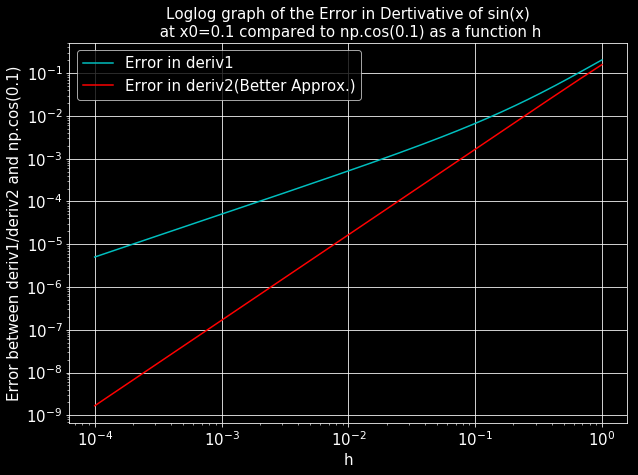

In [4]:
'''
   In this cell, created a loglog plot between the error and
   values of h fro each method on the same loglog plot. 
'''
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(h, err1, 'c', label='Error in deriv1')
ax.plot(h, err2, 'r', label='Error in deriv2(Better Approx.)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('h', fontsize=15)
plt.ylabel('Error between deriv1/deriv2 and np.cos(0.1)', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(prop={'size': 15})
plt.title(label='Loglog graph of the Error in Dertivative of sin(x)' 
          '\n at x0=0.1 compared to np.cos(0.1) as a function h', fontsize=15)
ax.grid()
slope1, intercept1 = np.polyfit(np.log(err1), np.log(h), 1)
slope2, intercept2 = np.polyfit(np.log(err2), np.log(h), 1)
print("Slope for Error in deriv1 is:", slope1)
print("Slope for Error in deriv2 is:", slope2)

## Question 2

In [5]:
x = np.linspace(-2.0, 2.0, 1000)
y = np.linspace(-2.0, 2.0, 1000)
c = np.zeros(1000)


for i in range(len(h)):
    c[i] = x[i] + 1.0j*y[i]


/opt/python/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


## Question 3

In [6]:
from scipy.integrate import ode

In [7]:
def SIR(t, y, b, g):
    S, I, R = y
    f = [-1*(b*S*I)/N, (b*S*I)/N - g*I, g*I]
    return f

In [10]:
res = ode(SIR).set_integrator('dopri5')

N = 1000
b = 0.1
g = 0.1
y0, t0 =[999, 1, 0], 0.0
res.set_initial_value(y0, t0).set_f_params(b, g, N)

T = 200
n = 1000
t = np.linspace(t0, T, n)
sol = np.empty((n, 3))
sol[0] = y0

i = 1
while res.successful() and res.t < T:
    #print(res.t+i, res.integrate(res.t+i))
    res.integrate(t[i])
    sol[i] = res.y
    i += 1

#plt.plot(t, sol[:,0], label='S')
#plt.plot(t, sol[:,1], label='I')
#plt.plot(t, sol[:,2], label='R')
#plt.grid()
#plt.legend()
#plt.show()

TypeError: 'float' object is not iterable